In [2]:
# reload packages
%load_ext autoreload
%autoreload 2

### Choose GPU

In [3]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=''#0

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=''#0


In [4]:
import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if len(gpu_devices)>0:
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
print(gpu_devices)
tf.keras.backend.clear_session()

[]


### Load packages

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
from IPython import display
import pandas as pd
import umap
import copy
import os, tempfile
import tensorflow_addons as tfa
import pickle


/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [15]:
dataset = "cifar10"
n_latent_dims = 1024
augmented = False

In [19]:
from tfumap.semisupervised_keras import load_architecture, load_pretrained_weights, load_dataset

In [20]:
encoder, classifier, embedder = load_architecture(dataset, n_latent_dims)

In [ ]:
from umap import UMAP

In [ ]:
import seaborn as sns
tab20 = sns.color_palette('tab20', 20)
tab20_dark = tab20[::2]
tab20_light = tab20[1::2]
sns.palplot(tab20_dark)
sns.palplot(tab20_light)
from matplotlib.colors import ListedColormap
darkcmap = ListedColormap(sns.color_palette(tab20_dark).as_hex())
lightcmap = ListedColormap(sns.color_palette(tab20_light).as_hex())

In [ ]:
from tfumap.paths import ensure_dir, DATA_DIR

W0828 15:33:14.182069 140437013612352 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fb930641668> and <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x7fb930654fd0>).
W0828 15:33:14.184584 140437013612352 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fb93064bb70> and <tensorflow.python.keras.layers.advanced_activations.

W0828 15:33:14.276132 140437013612352 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fb930711eb8> and <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb930717208>).
W0828 15:33:14.278709 140437013612352 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb930717208> and <tensorflow.python.keras.layers.adv

1250/1250 [==============================] - 1s 1ms/step
UMAP(dens_frac=0.0, dens_lambda=0.0, verbose=True)
Construct fuzzy simplicial set
Fri Aug 28 15:34:43 2020 Finding Nearest Neighbors
Fri Aug 28 15:34:43 2020 Building RP forest with 15 trees
Fri Aug 28 15:34:44 2020 parallel NN descent for 15 iterations
	 0  /  15
	 1  /  15
	 2  /  15
	 3  /  15
Fri Aug 28 15:34:46 2020 Finished Nearest Neighbor Search
Fri Aug 28 15:34:46 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Aug 28 15:35:20 2020 Finished embedding


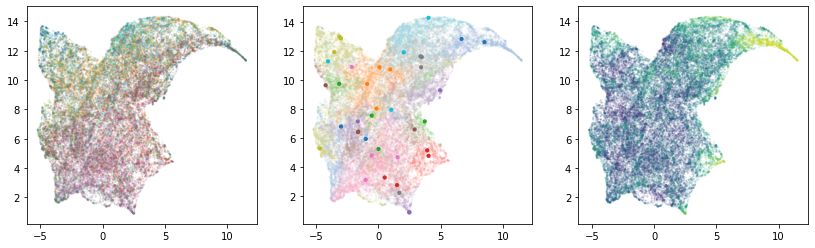

W0828 15:35:24.945070 140437013612352 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fb930641668> and <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x7fb930654fd0>).
W0828 15:35:24.948749 140437013612352 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fb93064bb70> and <tensorflow.python.keras.layers.advanced_activations.

W0828 15:35:25.060152 140437013612352 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fb930711eb8> and <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb930717208>).
W0828 15:35:25.075104 140437013612352 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb930717208> and <tensorflow.python.keras.layers.adv

1250/1250 [==============================] - 1s 1ms/step
UMAP(dens_frac=0.0, dens_lambda=0.0, verbose=True)
Construct fuzzy simplicial set
Fri Aug 28 15:38:32 2020 Finding Nearest Neighbors
Fri Aug 28 15:38:32 2020 Building RP forest with 15 trees
Fri Aug 28 15:38:32 2020 parallel NN descent for 15 iterations
	 0  /  15
	 1  /  15
	 2  /  15
	 3  /  15
Fri Aug 28 15:38:33 2020 Finished Nearest Neighbor Search
Fri Aug 28 15:38:34 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Aug 28 15:39:17 2020 Finished embedding


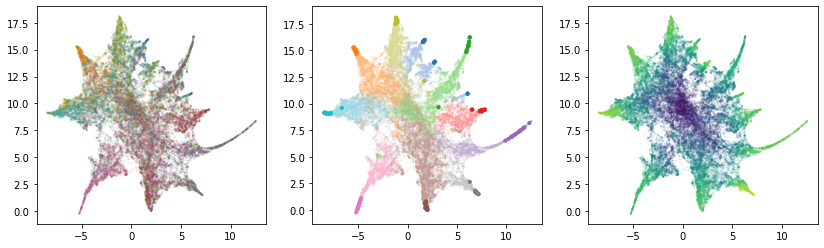

W0828 15:39:23.408121 140437013612352 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fb930641668> and <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x7fb930654fd0>).
W0828 15:39:23.409821 140437013612352 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fb93064bb70> and <tensorflow.python.keras.layers.advanced_activations.

W0828 15:39:23.677484 140437013612352 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fb930711eb8> and <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb930717208>).
W0828 15:39:23.684562 140437013612352 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb930717208> and <tensorflow.python.keras.layers.adv

1250/1250 [==============================] - 2s 1ms/step
UMAP(dens_frac=0.0, dens_lambda=0.0, verbose=True)
Construct fuzzy simplicial set
Fri Aug 28 15:42:45 2020 Finding Nearest Neighbors
Fri Aug 28 15:42:45 2020 Building RP forest with 15 trees
Fri Aug 28 15:42:45 2020 parallel NN descent for 15 iterations
	 0  /  15
	 1  /  15
	 2  /  15
Fri Aug 28 15:42:47 2020 Finished Nearest Neighbor Search
Fri Aug 28 15:42:47 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Aug 28 15:43:30 2020 Finished embedding


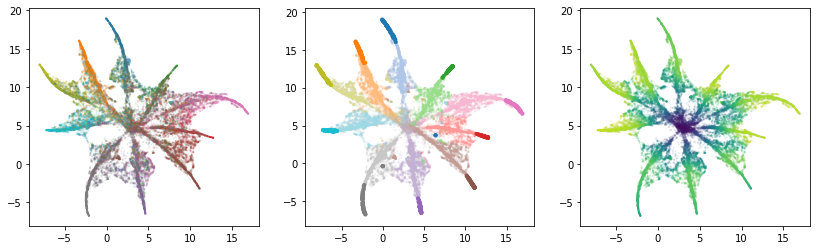

W0828 15:43:34.833307 140437013612352 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fb930641668> and <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x7fb930654fd0>).
W0828 15:43:34.835200 140437013612352 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fb93064bb70> and <tensorflow.python.keras.layers.advanced_activations.

W0828 15:43:34.969193 140437013612352 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fb930711eb8> and <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb930717208>).
W0828 15:43:34.972730 140437013612352 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb930717208> and <tensorflow.python.keras.layers.adv

1250/1250 [==============================] - 2s 1ms/step
UMAP(dens_frac=0.0, dens_lambda=0.0, verbose=True)
Construct fuzzy simplicial set
Fri Aug 28 15:51:09 2020 Finding Nearest Neighbors
Fri Aug 28 15:51:09 2020 Building RP forest with 15 trees
Fri Aug 28 15:51:09 2020 parallel NN descent for 15 iterations
	 0  /  15
	 1  /  15
	 2  /  15
Fri Aug 28 15:51:11 2020 Finished Nearest Neighbor Search
Fri Aug 28 15:51:11 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Aug 28 15:52:09 2020 Finished embedding


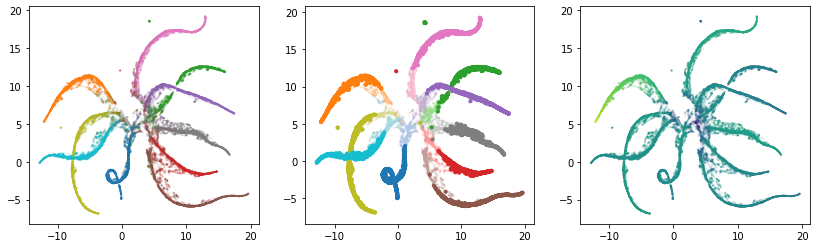

W0828 15:52:13.830997 140437013612352 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fb930641668> and <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x7fb930654fd0>).
W0828 15:52:13.833145 140437013612352 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fb93064bb70> and <tensorflow.python.keras.layers.advanced_activations.

W0828 15:52:13.952837 140437013612352 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow_addons.layers.wrappers.WeightNormalization object at 0x7fb930711eb8> and <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb930717208>).
W0828 15:52:13.957254 140437013612352 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb930717208> and <tensorflow.python.keras.layers.adv

1250/1250 [==============================] - 2s 1ms/step
UMAP(dens_frac=0.0, dens_lambda=0.0, verbose=True)
Construct fuzzy simplicial set
Fri Aug 28 15:55:32 2020 Finding Nearest Neighbors
Fri Aug 28 15:55:32 2020 Building RP forest with 15 trees
Fri Aug 28 15:55:33 2020 parallel NN descent for 15 iterations
	 0  /  15
	 1  /  15
	 2  /  15
Fri Aug 28 15:55:34 2020 Finished Nearest Neighbor Search
Fri Aug 28 15:55:35 2020 Construct embedding


/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Aug 28 15:56:07 2020 Finished embedding


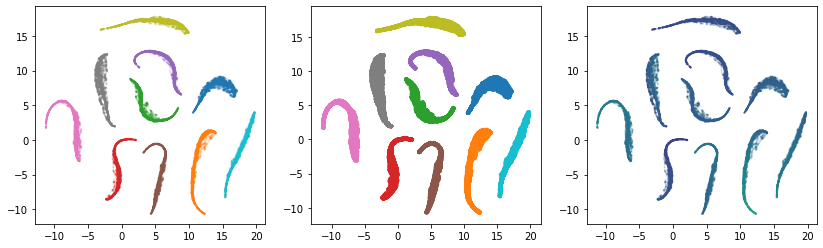

In [49]:
for labels_per_class in tqdm([4, 16, 64, 256, 1024, 'full']):
    encoder, classifier = load_pretrained_weights(dataset, augmented, labels_per_class, encoder, classifier)
    # load data
    (
        X_train,
        X_test,
        X_labeled,
        Y_labeled,
        Y_masked,
        X_valid,
        Y_train,
        Y_test,
        Y_valid,
        Y_valid_one_hot,
        Y_labeled_one_hot,
        num_classes,
        dims
    ) = load_dataset(dataset, labels_per_class)
    
    last_layer_class = tf.keras.models.Model(
        classifier.input, [classifier.get_layer(name=classifier.layers[-2].name).get_output_at(0)],
    )
    z = encoder.predict(X_train, verbose=True)
    # test current acc
    train_predictions = classifier.predict(z, verbose=True)
    train_confidence = np.max(train_predictions, axis=1)
    train_predictions = np.argmax(train_predictions, axis=1)
    
    last_layer_act = last_layer_class.predict(z, verbose=True)
    llz = UMAP(verbose=True).fit_transform(last_layer_act)
    
    fig, axs = plt.subplots(ncols=3, figsize=(14, 4))

    axs[0].scatter(
        llz[:, 0],
        llz[:, 1],
        c=Y_train,
        s=1,
        alpha=0.1,
        cmap=plt.cm.tab10,
    )
    axs[1].scatter(
        llz[:, 0],
        llz[:, 1],
        c=train_predictions,
        s=1,
        alpha=0.1,
        cmap=lightcmap,
    )

    axs[2].scatter(
        llz[:, 0],
        llz[:, 1],
        c=train_confidence,
        s=1,
        alpha=0.1,
        cmap=plt.cm.viridis,
    )

    axs[1].scatter(
        llz[Y_masked != -1, 0],
        llz[Y_masked != -1, 1],
        c=Y_train[Y_masked != -1].flatten(),
        s=10,
        alpha=1,
        cmap=darkcmap,
        rasterized=True,
    )
    plt.show()
    
    ### save data
    # ensure dir
    save_dir = DATA_DIR / 'ssl_embeddings' / dataset / str(labels_per_class)
    ensure_dir(save_dir)
    # save predictions
    np.save(save_dir/'train_predictions.npy', train_predictions)
    # save confidence
    np.save(save_dir/'train_confidence.npy', train_confidence)
    # save last layer z
    np.save(save_dir/'last_layer_embeddings.npy', llz)